<a href="https://colab.research.google.com/github/newadays/AI-Incubator-Program/blob/main/Recommenders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System - Churn Prediction

Algorithms like linear regression, and XGBoost can help predict customers who are likely to churn. Since the cost of acquiring new customers is much higher than keeping existing ones, we can drive some business value by predicting churn. If you are looking to identify high-value customers, you can check the article [here](https://medium.com/@segunawodokun/targeting-high-value-customers-with-bqml-and-functions-in-20-minutes-aa53b3133efa)

We will cover the following:

1.   EDA
2.   Linear Regression
3.   XGBoost (Boosted trees)

You will need to take the following steps for us to process the data:
* Download the [Store Sales Data from Kaggle](https://www.kaggle.com/datasets/imanemag/bankchurnerscsv)
* Upload the CSV to the notebook using the Folder button
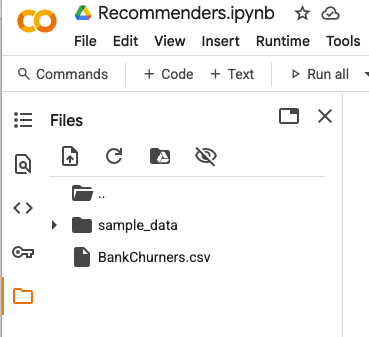

In [4]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [5]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.shape

(10127, 23)

In [7]:
# Check for unique ID
data['CLIENTNUM'].nunique()

10127

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [10]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [12]:
# Check for null values
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [13]:
# Check for the null values
data[data['Education_Level'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [14]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

/tmp/ipython-input-14-2507888619.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-14-2507888619.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-14-2507888619.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
data[data['Education_Level'] != 'Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [16]:
# Binning
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())
data.groupby(['Customer_Age']).agg(['min', 'max', 'count'])

26
73


CLIENTNUM                      Attrition_Flag  \
                    min        max count                min   
Customer_Age                                                  
26            708147108  822051858    78  Attrited Customer   
27            708185208  813990483    32  Attrited Customer   
28            709367433  815104608    29  Attrited Customer   
29            708242283  822905058    56  Attrited Customer   
30            708231183  818235408    70  Attrited Customer   
31            708178608  824168808    91  Attrited Customer   
32            708098133  824667708   106  Attrited Customer   
33            708171858  818248383   127  Attrited Customer   
34            708085458  824172258   146  Attrited Customer   
35            708134283  826417233   184  Attrited Customer   
36            708204033  826401858   221  Attrited Customer   
37            708099183  818701383   260  Attrited Customer   
38            708170508  828291858   303  Attrited Customer   
39            708148158  827890758   333  Attrited Customer   
40            708139833  827904183   361  Attrited Customer   
41            708123033  828285858   379  Attrited Customer   
42            708248358  827712108   426  Attrited Customer   
43            708095133  828343083   473  Attrited Customer   
44            708117933  827408058   500  Attrited Customer   
45            708082083  827643858   486  Attrited Customer   
46            708084558  827970933   490  Attrited Customer   
47            708108333  827948133   479  Attrited Customer   
48            708121908  827683383   472  Attrited Customer   
49            708086958  828294933   495  Attrited Customer   
50            708128733  828288333   452  Attrited Customer   
51            708177333  827901183   398  Attrited Customer   
52            708103608  826762908   376  Attrited Customer   
53            708113208  827123883   387  Attrited Customer   
54            708152358  828298908   307  Attrited Customer   
55            708100533  828215508   279  Attrited Customer   
56            708112008  827476983   262  Attrited Customer   
57            708197358  827631483   223  Attrited Customer   
58            708083283  827964858   157  Attrited Customer   
59            708253458  827635083   157  Attrited Customer   
60            708496833  826808208   127  Attrited Customer   
61            708145908  822969858    93  Attrited Customer   
62            708136908  823590483    93  Attrited Customer   
63            708217758  822955008    65  Attrited Customer   
64            708162558  820633833    43  Attrited Customer   
65            708267858  822961533   101  Attrited Customer   
66            708300483  711525033     2  Attrited Customer   
67            717296808  779241783     4  Existing Customer   
68            708868233  712720158     2  Attrited Customer   
70            787348608  787348608     1  Existing Customer   
73            715952883  715952883     1  Existing Customer   

                                      Gender           Dependent_count      \
                            max count    min max count             min max   
Customer_Age                                                                 
26            Existing Customer    78      F   M    78               0   2   
27            Existing Customer    32      F   M    32               0   2   
28            Existing Customer    29      F   M    29               0   1   
29            Existing Customer    56      F   M    56               0   2   
30            Existing Customer    70      F   M    70               0   2   
31            Existing Customer    91      F   M    91               0   2   
32            Existing Customer   106      F   M   106               0   4   
33            Existing Customer   127      F   M   127               0   4   
34            Existing Customer   146      F   M   146               0   5   
35            Existing Customer   184      F   M   18

In [17]:
# binnings
bins = [25,30,40,50,60,70,80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins']=pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [18]:
data[data['Customer_Age']==30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
789,754654383,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,711748983,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,779149683,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,772375533,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,714131058,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,715923408,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300,30s
10004,764316708,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595,30s
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,30s
10055,710066133,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,30s


In [19]:
# EDA
data['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [20]:
data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0]

np.float64(0.1606596227905599)

In [21]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0] *100, 2), '% of our customers have churned')

16.07 % of our customers have churned


In [22]:
# 1. how many instances are in the dataset (frequency or counts)?
# 2. a measure of central tendency (mean, median, mode)?
# 3. the spread of the dataset (variance, standard deviation)?
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [23]:
print('The average Total_Relationship_Count is', round(np.mean(data['Total_Relationship_Count']), 2),
      'and the median is', round(np.median(data['Total_Relationship_Count']),2))

The average Total_Relationship_Count is 3.81 and the median is 4.0


In [24]:
print('The average Credit_Limit is $', round(np.mean(data['Credit_Limit']), 2),
      'and the median is', round(np.median(data['Credit_Limit']),2))

The average Credit_Limit is $ 8631.95 and the median is 4549.0


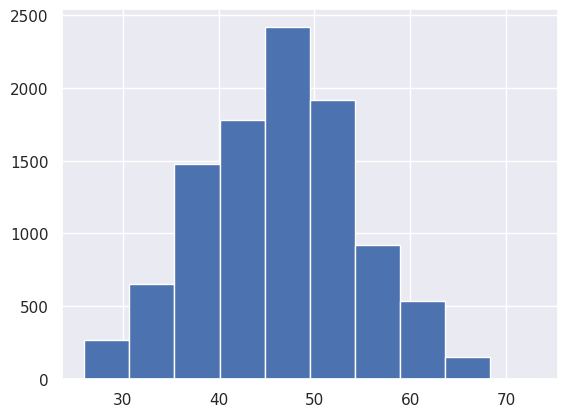

In [25]:
import matplotlib.pyplot as plt
plt.hist(data['Customer_Age']);

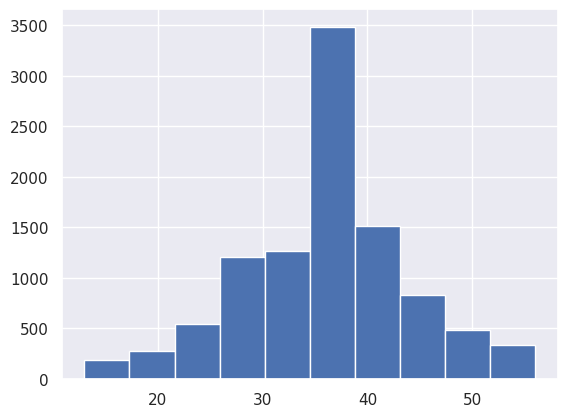

In [26]:
plt.hist(data['Months_on_book']);

mean 8631.953698034955
median 4549.0


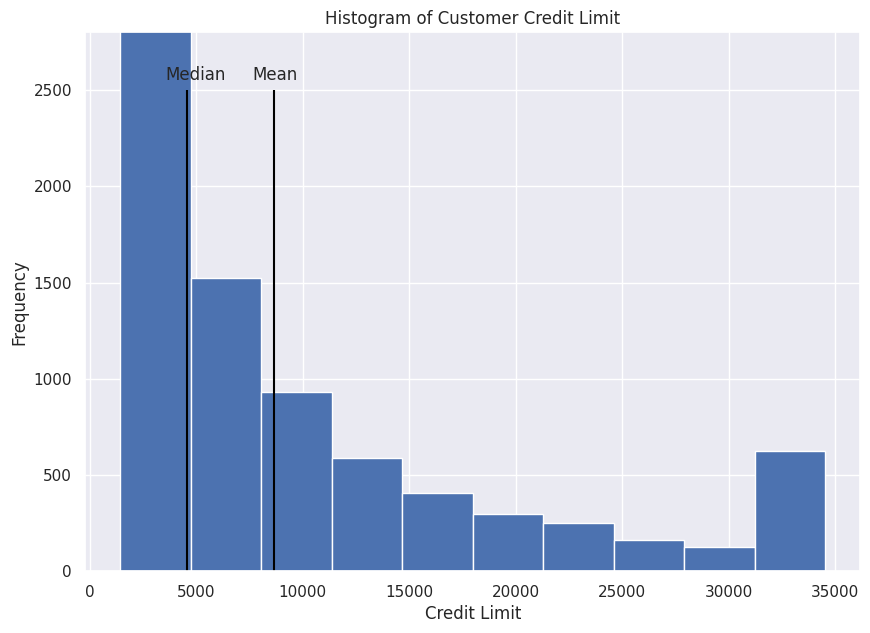

In [27]:
print('mean', data['Credit_Limit'].mean())
print('median', data['Credit_Limit'].median())

plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit']);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, 'Mean')
plt.text(data['Credit_Limit'].median()-1000, 2500+50, 'Median')
plt.ylim(0, 2800)
plt.title('Histogram of Customer Credit Limit')
plt.ylabel('Frequency')
plt.xlabel('Credit Limit');

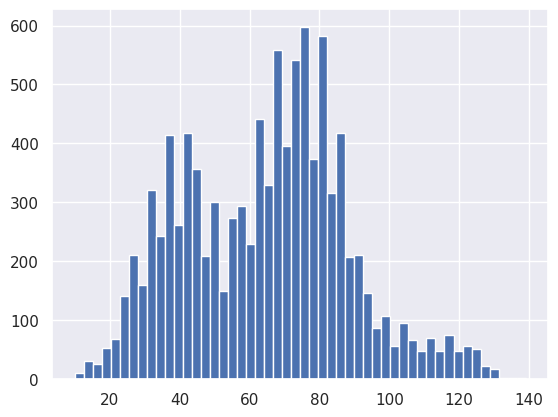

In [28]:
# Binomial distribution
plt.hist(data['Total_Trans_Ct'], bins=50);

In [29]:
# Normalization
# Log transformation - make the data less skewed
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [30]:
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

In [31]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [32]:
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [33]:
#numeric columns - initial predictions
# list(data.select_dtypes(include=[np.number]))
X=data.select_dtypes(include=[np.number])
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Normalized,Credit_Limit_Log_Transformed
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.340190,9.448648
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.206112,9.018695
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.059850,8.136811
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.056676,8.105609
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.099091,8.458716


We can predict customers that will churn using these two algorithms

*   Linear Regression
*   Boosted Tree / XGBoost



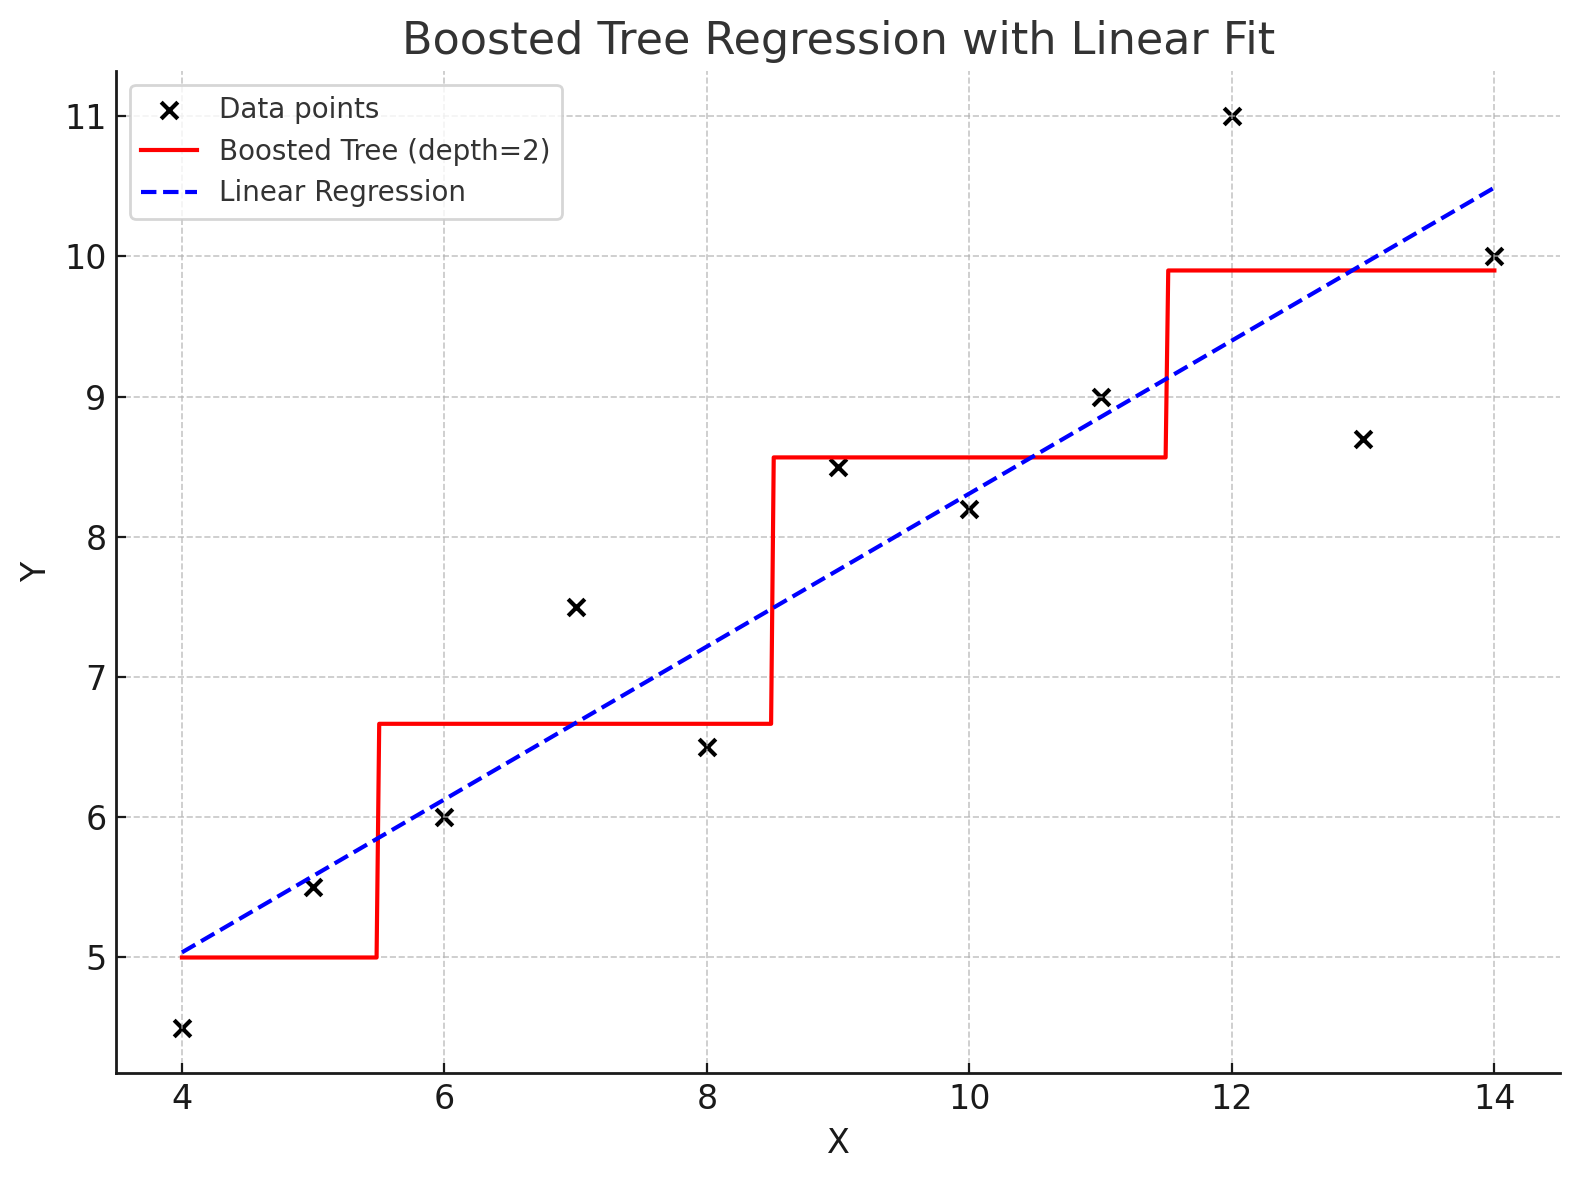

In [34]:
y = data[['Attrition_Flag']]
y.head()

,Attrition_Flag
0,Existing Customer
1,Existing Customer
2,Existing Customer
3,Existing Customer
4,Existing Customer


In [35]:
#transform y into numeric to make predictions easier
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Create a mapping dictionary
# mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
# y_numeric = y.map(mapping)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [36]:
#Numeric Output - Linear regression only work on numeric input
y_numeric

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
lr_elev = LinearRegression()
lr_elev.fit(X, y_numeric)

LinearRegression()

In [38]:
lr_elev.coef_

array([ 3.99149983e-10,  6.28407704e-04, -1.19875625e-02, -2.17847599e-04,
        4.27346398e-02, -4.20754867e-02, -4.19209112e-02,  2.35547039e-05,
        5.01090687e-05, -2.65543648e-05,  6.02229670e-02, -3.50997511e-05,
        9.69456827e-03,  2.94549312e-01,  7.01233678e-02,  7.12102230e-10,
        6.03274030e-02])

In [39]:
lr_elev.intercept_

np.float64(-0.7416516704067684)

<Axes: >

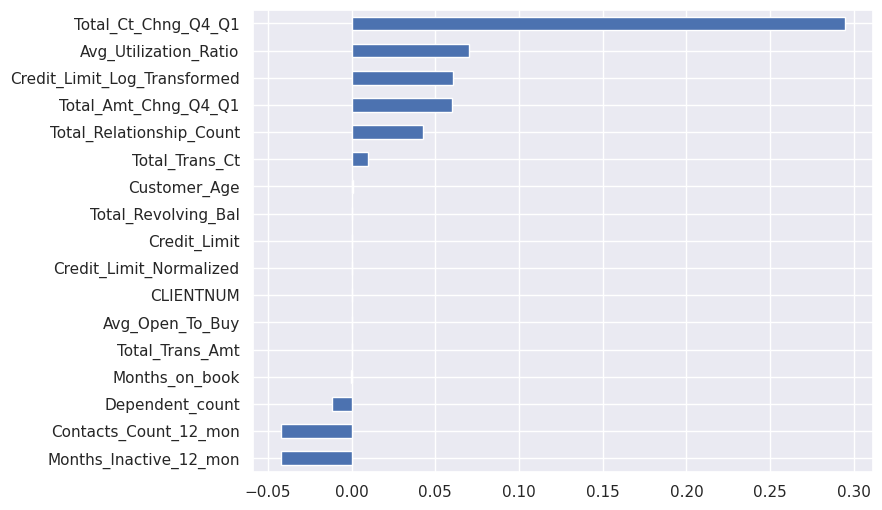

In [40]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [41]:
# score is R^2 - the proportion of variance explained by the model
lr_elev.score(X, y_numeric)

0.3679303588637548

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_numeric, lr_elev.predict(X)), mean_squared_error(y_numeric, lr_elev.predict(X))

(0.2186329372476468, 0.08523339548135346)

In [43]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep pandas functionality
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Normalized,Credit_Limit_Log_Transformed
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,-6.398884e-16,1.333101e-16,-7.577626e-17,-3.381866e-16,-4.490445e-17,1.613754e-16,-7.858279e-17,1.347133e-16,-7.016320e-17,4.490445e-17,3.830911e-16,-8.980890e-17,-2.245222e-16,-3.115246e-16,-7.296973e-17,-1.571656e-16,1.436942e-15
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-8.426523e-01,-2.535541e+00,-1.806378e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01,-7.915266e-01,-1.426756e+00
25%,-7.083861e-01,-6.643815e-01,-1.036462e+00,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01,-6.686548e-01,-8.113804e-01
50%,-5.758840e-01,-4.066159e-02,-2.665471e-01,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01,-4.492525e-01,-1.935792e-01
75%,9.204369e-01,7.078024e-01,5.033681e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01,2.679862e-01,7.586362e-01
max,2.416280e+00,3.327426e+00,2.043199e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00,2.848054e+00,1.976781e+00


In [44]:
lr_std = LinearRegression()
lr_std.fit(X_scaled, y_numeric)
lr_std.score(X_scaled, y_numeric)

0.3679303588637548

<Axes: >

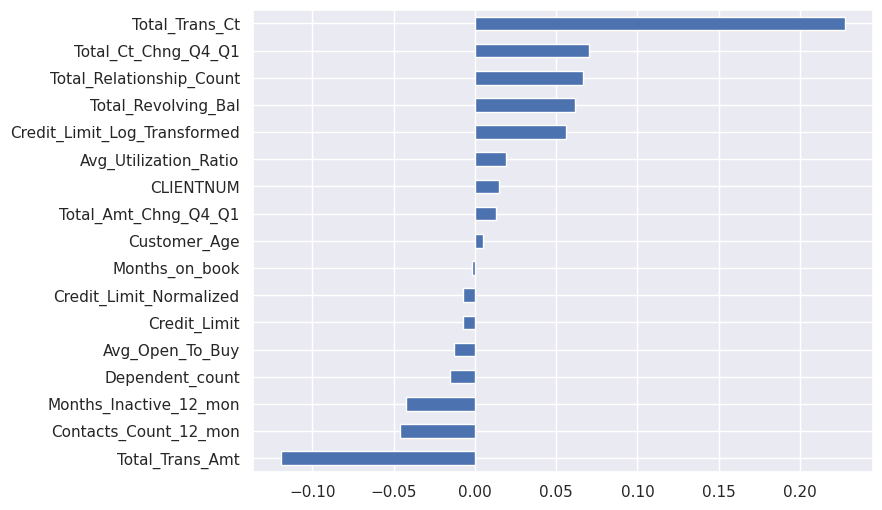

In [45]:
pd.Series(lr_std.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [46]:
# try with XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y_numeric)
xgb.score(X, y_numeric)

0.9713245034217834

In [47]:
#train test split

In [48]:
#split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.25, random_state=42, shuffle=True, stratify=None)

In [49]:
# iterate through
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7715584635734558

In [50]:
# Write the DataFrame to a CSV file and store in BigQuery
# data.to_csv('bank_churn_prediction.csv', index=False)

In [51]:
#Operationalize these with BigQuery [Optional] - See setup steps here - https://colab.research.google.com/drive/1svuHzh9MQWfwCLoSsOIgdmkrl19kOpkw?usp=sharing

# 1. Replace 'your_project.your_dataset' with your actual project and dataset names
# 2. Replace feature columns (feature1, feature2, etc.) with your actual feature column names
# 3. Replace 'label_column' with your actual target variable name
# 4. Adjust hyperparameters based on your data size and complexity
# 5. For binary classification, ensure your label column contains 0/1 or TRUE/FALSE values
# 6. For multi-class classification, ensure your label column contains string labels
# 7. Consider using data_split_col for custom train/test splits
# 8. Monitor training progress and adjust early_stop settings as needed



# -- =============================================
# -- BigQuery ML Boosted Tree Model Workflow
# -- =============================================

# -- Step 1: Create the Boosted Tree Model
# -- This example uses a classification model for customer churn prediction
# CREATE OR REPLACE MODEL `your_project.your_dataset.boosted_tree_model`
# OPTIONS(
#   model_type='BOOSTED_TREE_CLASSIFIER',
#   num_parallel_tree=50,
#   max_iterations=20,
#   tree_method='HIST',
#   min_tree_child_weight=5,
#   colsample_bytree=0.8,
#   subsample=0.85,
#   reg_alpha=0.1,
#   reg_lambda=1.0,
#   early_stop=TRUE,
#   learn_rate=0.3,
#   max_tree_depth=6,
#   l1_reg=0,
#   l2_reg=0,
#   input_label_cols=['label_column'],
#   data_split_method='RANDOM',
#   data_split_eval_fraction=0.2,
#   data_split_col='split_column'
# ) AS
# SELECT
#   feature1,
#   feature2,
#   feature3,
#   feature4,
#   feature5,
#   -- Add your feature columns here
#   label_column  -- Your target variable (0/1 for binary classification)
# FROM
#   `your_project.your_dataset.training_data`
# WHERE
#   label_column IS NOT NULL;

# -- =============================================
# -- Alternative: Boosted Tree Regressor
# -- =============================================
# /*
# CREATE OR REPLACE MODEL `your_project.your_dataset.boosted_tree_regressor`
# OPTIONS(
#   model_type='BOOSTED_TREE_REGRESSOR',
#   num_parallel_tree=100,
#   max_iterations=50,
#   tree_method='HIST',
#   min_tree_child_weight=1,
#   colsample_bytree=0.8,
#   subsample=0.8,
#   reg_alpha=0,
#   reg_lambda=1,
#   early_stop=TRUE,
#   learn_rate=0.1,
#   max_tree_depth=6,
#   input_label_cols=['target_value']
# ) AS
# SELECT
#   feature1,
#   feature2,
#   feature3,
#   target_value  -- Continuous target variable for regression
# FROM
#   `your_project.your_dataset.regression_training_data`;
# */

# -- =============================================
# -- Step 2: Evaluate the Model
# -- =============================================

# -- Basic model evaluation
# SELECT
#   *
# FROM
#   ML.EVALUATE(MODEL `your_project.your_dataset.boosted_tree_model`);

# -- Detailed evaluation with test data
# SELECT
#   *
# FROM
#   ML.EVALUATE(MODEL `your_project.your_dataset.boosted_tree_model`,
#     (
#       SELECT
#         feature1,
#         feature2,
#         feature3,
#         feature4,
#         feature5,
#         label_column
#       FROM
#         `your_project.your_dataset.test_data`
#       WHERE
#         label_column IS NOT NULL
#     )
#   );

# -- =============================================
# -- Step 3: Get Feature Importance
# -- =============================================
# SELECT
#   feature,
#   importance_weight,
#   importance_gain,
#   importance_cover
# FROM
#   ML.FEATURE_IMPORTANCE(MODEL `your_project.your_dataset.boosted_tree_model`)
# ORDER BY
#   importance_weight DESC;

# -- =============================================
# -- Step 4: Make Predictions
# -- =============================================

# -- Basic predictions
# SELECT
#   *
# FROM
#   ML.PREDICT(MODEL `your_project.your_dataset.boosted_tree_model`,
#     (
#       SELECT
#         feature1,
#         feature2,
#         feature3,
#         feature4,
#         feature5
#       FROM
#         `your_project.your_dataset.prediction_data`
#     )
#   );

# -- Predictions with probability scores (for classification)
# SELECT
#   customer_id,
#   predicted_label_column,
#   predicted_label_column_probs,
#   feature1,
#   feature2,
#   feature3
# FROM
#   ML.PREDICT(MODEL `your_project.your_dataset.boosted_tree_model`,
#     (
#       SELECT
#         customer_id,
#         feature1,
#         feature2,
#         feature3,
#         feature4,
#         feature5
#       FROM
#         `your_project.your_dataset.new_customers`
#     )
#   )
# ORDER BY
#   predicted_label_column_probs[OFFSET(1)].prob DESC;  -- Sort by probability of positive class

# -- =============================================
# -- Step 5: Model Information and Training Stats
# -- =============================================

# -- Get model training information
# SELECT
#   *
# FROM
#   ML.TRAINING_INFO(MODEL `your_project.your_dataset.boosted_tree_model`);

# -- Get model weights (tree structure information)
# SELECT
#   *
# FROM
#   ML.WEIGHTS(MODEL `your_project.your_dataset.boosted_tree_model`)
# LIMIT 100;

# -- =============================================
# -- Step 6: Advanced Predictions with Explanations
# -- =============================================

# -- Get predictions with explanations (feature attributions)
# SELECT
#   *
# FROM
#   ML.EXPLAIN_PREDICT(MODEL `your_project.your_dataset.boosted_tree_model`,
#     (
#       SELECT
#         feature1,
#         feature2,
#         feature3,
#         feature4,
#         feature5
#       FROM
#         `your_project.your_dataset.prediction_data`
#       LIMIT 10  -- Limit for explanation queries as they can be expensive
#     ),
#     STRUCT(3 as top_k_features, 0.5 as threshold)
#   );

# -- =============================================
# -- Step 7: Model Performance Monitoring
# -- =============================================

# -- Monitor model performance over time
# WITH predictions AS (
#   SELECT
#     actual_label,
#     predicted_label_column as predicted_label,
#     predicted_label_column_probs[OFFSET(1)].prob as predicted_probability,
#     CURRENT_DATE() as prediction_date
#   FROM
#     ML.PREDICT(MODEL `your_project.your_dataset.boosted_tree_model`,
#       (
#         SELECT
#           feature1,
#           feature2,
#           feature3,
#           feature4,
#           feature5,
#           label_column as actual_label
#         FROM
#           `your_project.your_dataset.recent_data`
#       )
#     )
# )
# SELECT
#   prediction_date,
#   COUNT(*) as total_predictions,
#   AVG(CASE WHEN actual_label = predicted_label THEN 1 ELSE 0 END) as accuracy,
#   AVG(predicted_probability) as avg_predicted_probability
# FROM predictions
# GROUP BY prediction_date
# ORDER BY prediction_date;

# -- =============================================
# -- Usage Notes:
# -- =============================================